In [208]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [209]:
#Import dataset and create a DF
dataset = pd.read_excel('/Users/lucy/Desktop/zoopla/zoop_v13.xlsx')

In [210]:
#select columns in the DF
dataset = dataset[['listing Id','published date', 'outcode', 'post town', 'description', 'property type', 'furnished state', 'bedrooms', 'bathrooms', 'num_reception', 'bills_included', 'latitude', 'longitude', 'monthly rent']]
                   

In [211]:
#display DF
dataset.head(3)

,listing Id,published date,outcode,post town,description,property type,furnished state,bedrooms,bathrooms,num_reception,bills_included,latitude,longitude,monthly rent
0,51756505,2021-08-07 07:35:46,B1,Birmingham,***Available 11th August 2021**Furnished groun...,Flat,part_furnished,1,1,0,0,52.476063,-1.911296,675
1,59345196,2021-08-02 15:27:21,B11,Birmingham,Three Bedroom Property Available in SparkhillT...,Terraced house,unfurnished,3,1,2,0,52.456490,-1.861211,850
2,39706692,2021-08-06 17:54:01,B31,Birmingham,This well presented ground floor apartment is ...,Flat,unfurnished,2,1,0,0,52.418476,-1.973989,560


In [212]:
#Shape of the DF
#DF contains 14,773 rows and 14 columns
dataset.shape

(14773, 14)

In [213]:
#Display information of the DF
#The columns contain different data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14773 entries, 0 to 14772
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   listing Id       14773 non-null  int64         
 1   published date   14773 non-null  datetime64[ns]
 2   outcode          14773 non-null  object        
 3   post town        14773 non-null  object        
 4   description      14750 non-null  object        
 5   property type    14076 non-null  object        
 6   furnished state  14052 non-null  object        
 7   bedrooms         14773 non-null  int64         
 8   bathrooms        14773 non-null  int64         
 9   num_reception    14773 non-null  int64         
 10  bills_included   14773 non-null  int64         
 11  latitude         14773 non-null  float64       
 12  longitude        14773 non-null  float64       
 13  monthly rent     14773 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int6

In [214]:
#Find Duplicates
#There are no duplicates
dataset.duplicated().sum()

0

In [215]:
#Droping listing id and outcode 
dataset = dataset.drop(['listing Id', 'outcode'], axis=1)

In [216]:
#Check for missing values
dataset.isna().sum()

published date       0
post town            0
description         23
property type      697
furnished state    721
bedrooms             0
bathrooms            0
num_reception        0
bills_included       0
latitude             0
longitude            0
monthly rent         0
dtype: int64

In [217]:
# % of missing values
((dataset.isnull() | dataset.isna()).sum() * 100 / dataset.index.size).round(2)

published date     0.00
post town          0.00
description        0.16
property type      4.72
furnished state    4.88
bedrooms           0.00
bathrooms          0.00
num_reception      0.00
bills_included     0.00
latitude           0.00
longitude          0.00
monthly rent       0.00
dtype: float64

<b>#Handle missing values</b>

In [218]:
# replace null with 'none' for the column 'description'
dataset['description'] = dataset['description'].replace(np.nan, 'none')

In [219]:
#replacing missing values in property type as 'unknown'
dataset['property type'] = dataset['property type'].replace(np.nan, 'Unknown')

In [220]:
#replacing missing values in 'furnished state' as 'unknown'
dataset['furnished state'] = dataset['furnished state'].replace(np.nan, 'Unknown')

In [221]:
#Re-Check for missing values
dataset.isna().sum()

published date     0
post town          0
description        0
property type      0
furnished state    0
bedrooms           0
bathrooms          0
num_reception      0
bills_included     0
latitude           0
longitude          0
monthly rent       0
dtype: int64

<b>Check overall data quality first in categorical variables<b/>

In [222]:
#Check cetegories of property type by size
dataset.groupby('property type').size()

property type
Bungalow                   190
Detached bungalow           41
Detached house             662
End terrace house          398
Flat                      6705
Link-detached house          9
Maisonette                 147
Semi-detached bungalow      16
Semi-detached house       1658
Studio                    1194
Terraced house            2751
Town house                 305
Unknown                    697
dtype: int64

In [223]:
#Some of the categories can be reclassified
#Reclassify the property types

dataset['property type'] = dataset['property type'].replace('Maisonette', 'Flat')
dataset['property type'] = dataset['property type'].replace('Town house', 'Terraced house')
dataset['property type'] = dataset['property type'].replace('End terrace house', 'Terraced house')
dataset['property type'] = dataset['property type'].replace('Link-detached house', 'Detached house')
dataset['property type'] = dataset['property type'].replace('Detached bungalow', 'Bungalow')
dataset['property type'] = dataset['property type'].replace('Semi-detached bungalow', 'Bungalow')

In [224]:
#recheck categories in property types
#Contains 7 categories
dataset.groupby('property type').size()

property type
Bungalow                247
Detached house          671
Flat                   6852
Semi-detached house    1658
Studio                 1194
Terraced house         3454
Unknown                 697
dtype: int64

In [225]:
#Check categories in 'Furnished state'
dataset.groupby('furnished state').size()


furnished state
Unknown            721
furnished         5033
part_furnished    2233
unfurnished       6786
dtype: int64

In [226]:
#Relabeling 'bills_included' as yes/no as it is a categorical variable

dataset['bills_included'] = dataset['bills_included'].replace(0, 'no')
dataset['bills_included'] = dataset['bills_included'].replace(1, 'yes')

In [227]:
#Check values in each category
dataset['bills_included'].value_counts()

no     12385
yes     2388
Name: bills_included, dtype: int64

Check data quality in numerical variable

In [228]:
#statistics of the numerical variables

dataset.describe()

,bedrooms,bathrooms,num_reception,latitude,longitude,monthly rent
count,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000
mean,2.177757,1.335342,0.797536,52.580905,-1.626661,927.134231
std,1.368755,0.796890,0.647405,0.221518,0.388543,522.947638
min,0.000000,0.000000,0.000000,51.853943,-2.919140,217.000000
25%,1.000000,1.000000,0.000000,52.428753,-1.927918,650.000000
50%,2.000000,1.000000,1.000000,52.494186,-1.559606,775.000000
75%,3.000000,1.000000,1.000000,52.681625,-1.214702,995.000000
max,11.000000,10.000000,4.000000,53.116110,-0.776808,5000.000000


Minumum number of bedrooms and reception rooms can be 0 but bathrooms cannot be 0.

<AxesSubplot:xlabel='bathrooms', ylabel='bedrooms'>

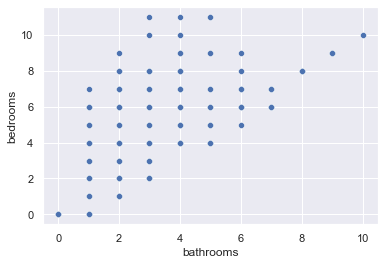

In [229]:
#the plot shows the values for bathroom is 0 when number of bedrooms is 0. 
sns.set_theme(color_codes=True)

sns.scatterplot(x="bathrooms", y="bedrooms", data=dataset)

In [230]:
#find the number of instances with value for bathrooms = 0
len(dataset.loc[(dataset['bathrooms']==0)])

28

In [231]:
#Check if there are for studio properties as the bedrooms also show 0 in the plot
#It is confirmed that those instances are for studio properties
len(dataset.loc[(dataset['property type']=="Studio") & (dataset['bathrooms']<1)])

28

In [232]:
#There are 1194 studio properties in the dataset and all of them have 0 bedrooms
len(dataset.loc[(dataset['property type']=="Studio") & (dataset['bedrooms']==0)])

1194

In [233]:
#The bathrooms are inputted as 0 for 28 studio properties which has 0 bedrooms
len(dataset.loc[(dataset['bedrooms']==0) & (dataset['bathrooms']==0)])

28

In [234]:
#Change the value of bathroom to 1 for those instances
dataset.loc[(dataset['bedrooms']==0) & (dataset['bathrooms']<1),'bathrooms']=1

In [235]:
#Recheck if there are any bathrooms with 0 values 
len(dataset.loc[(dataset['bathrooms']==0)])

0

<b>Feature Engineering</b>

Distance to amenities - railway station, school and the quality of school

In [237]:
#Display current dataset
dataset.head(3)

,published date,post town,description,property type,furnished state,bedrooms,bathrooms,num_reception,bills_included,latitude,longitude,monthly rent
0,2021-08-07 07:35:46,Birmingham,***Available 11th August 2021**Furnished groun...,Flat,part_furnished,1,1,0,no,52.476063,-1.911296,675
1,2021-08-02 15:27:21,Birmingham,Three Bedroom Property Available in SparkhillT...,Terraced house,unfurnished,3,1,2,no,52.456490,-1.861211,850
2,2021-08-06 17:54:01,Birmingham,This well presented ground floor apartment is ...,Flat,unfurnished,2,1,0,no,52.418476,-1.973989,560


<b>The Distance to Rail and school columns and ofsted ratings were created seperately on another notebook and are added to this DF (dataset)</b>

In [238]:
#Import dataset and create DF to access the dist to rail and school columns
df1 = pd.read_excel('/Users/lucy/Desktop/zoopla/zoop_v13.xlsx')

In [239]:
#Join the 'Distance to nearest railway station', 'Dist to school' and the 'Ofsted rating of the nearest school'
dist_column = df1[["dist_rail", 'dist_school', 'ofsted_rating_school']]
dataset = pd.concat([dataset,dist_column], axis = 1)
dataset.head(3)

,published date,post town,description,property type,furnished state,bedrooms,bathrooms,num_reception,bills_included,latitude,longitude,monthly rent,dist_rail,dist_school,ofsted_rating_school
0,2021-08-07 07:35:46,Birmingham,***Available 11th August 2021**Furnished groun...,Flat,part_furnished,1,1,0,no,52.476063,-1.911296,675,0.556,0.507,Good
1,2021-08-02 15:27:21,Birmingham,Three Bedroom Property Available in SparkhillT...,Terraced house,unfurnished,3,1,2,no,52.456490,-1.861211,850,0.823,0.066,Good
2,2021-08-06 17:54:01,Birmingham,This well presented ground floor apartment is ...,Flat,unfurnished,2,1,0,no,52.418476,-1.973989,560,1.273,0.206,Good


In [240]:
#Check for missing values in the new columns
#Missing values exists in Ofsted rating school column
dataset.isnull().sum()

published date             0
post town                  0
description                0
property type              0
furnished state            0
bedrooms                   0
bathrooms                  0
num_reception              0
bills_included             0
latitude                   0
longitude                  0
monthly rent               0
dist_rail                  0
dist_school                0
ofsted_rating_school    1593
dtype: int64

In [241]:
#Replace null with 'unknown' in the column 'Ofsted_rating_school'
dataset['ofsted_rating_school'] = dataset['ofsted_rating_school'].replace(np.nan, 'Unknown')

<b>GeoClusters - Create clusters with the latitude and longitude</b>

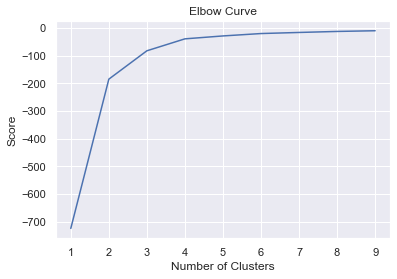

In [243]:
#Use Elbow method to identify how many clusters to create

from sklearn.cluster import KMeans
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = dataset[['latitude']]
X_axis = dataset[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [244]:
#Enter how many clusters to be created
kmeans = KMeans(n_clusters = 4, init ='k-means++')

# Compute k-means clustering
kmeans.fit(dataset[['latitude', 'longitude']]) 
dataset['cluster_label'] = kmeans.fit_predict(dataset[['latitude', 'longitude']])

# Coordinates of cluster centers
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = kmeans.predict(dataset[['latitude', 'longitude']]) 

#Display dataset
dataset.head(10)

,published date,post town,description,property type,furnished state,bedrooms,bathrooms,num_reception,bills_included,latitude,longitude,monthly rent,dist_rail,dist_school,ofsted_rating_school,cluster_label
0,2021-08-07 07:35:46,Birmingham,***Available 11th August 2021**Furnished groun...,Flat,part_furnished,1,1,0,no,52.476063,-1.911296,675,0.556,0.507,Good,1
1,2021-08-02 15:27:21,Birmingham,Three Bedroom Property Available in SparkhillT...,Terraced house,unfurnished,3,1,2,no,52.456490,-1.861211,850,0.823,0.066,Good,1
2,2021-08-06 17:54:01,Birmingham,This well presented ground floor apartment is ...,Flat,unfurnished,2,1,0,no,52.418476,-1.973989,560,1.273,0.206,Good,1
3,2021-08-07 07:26:42,Leicester,Barkers are pleased to offer a self contained ...,Flat,part_furnished,1,1,0,no,52.616234,-1.124677,675,1.664,0.404,Good,0
4,2021-08-07 07:26:42,Leicester,Barkers are please to offer a three share mais...,Flat,furnished,3,1,1,no,52.631287,-1.145698,845,1.410,0.215,Good,0
5,2021-08-06 23:40:36,Stone,"DescriptionIn brief the layout comprises, spac...",Flat,unfurnished,1,1,1,no,52.902110,-2.143334,450,1.119,0.491,Good,3
6,2021-08-06 21:40:45,Stone,Austin & Roe are proud to bring to market this...,Flat,part_furnished,2,2,0,no,52.904070,-2.148544,1100,0.725,0.115,Good,3
7,2021-08-06 20:37:13,Stafford,Great opportunity to rent this one bedroom apa...,Flat,unfurnished,1,1,1,no,52.806877,-2.116718,625,0.496,0.064,Good,3
8,2021-08-06 20:37:11,Leamington Spa,A three double bedroom duplex apartment set wi...,Flat,furnished,3,1,1,no,52.295185,-1.540526,745,1.224,0.167,Good,2
9,2021-08-06 20:35:20,Birmingham,"""Available with Zero Deposit"" What an opportun...",Flat,part_furnished,2,1,1,no,52.479150,-1.964060,625,1.978,0.235,Good,1


In [245]:
#Relabel cluster numbers into labels - cluster 1, 2..
dataset['cluster_label'] = dataset['cluster_label'].replace(0, 'cluster 1')
dataset['cluster_label'] = dataset['cluster_label'].replace(1, 'cluster 2')
dataset['cluster_label'] = dataset['cluster_label'].replace(2, 'cluster 3')
dataset['cluster_label'] = dataset['cluster_label'].replace(3, 'cluster 4')

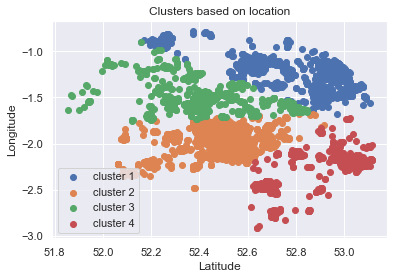

In [117]:
#Visualise the geoclusters

import matplotlib.pyplot as plt
import numpy as  np

fig, ax = plt.subplots()
x = np.array(dataset['latitude'])
y = np.array(dataset['longitude'])
group = np.array(dataset['cluster_label'])
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(x[i], y[i], label=g)
ax.legend(loc='lower left')
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title('Clusters based on location')
plt.show()

In [246]:
#Display dataset to check cluster labels
dataset.head(3)

,published date,post town,description,property type,furnished state,bedrooms,bathrooms,num_reception,bills_included,latitude,longitude,monthly rent,dist_rail,dist_school,ofsted_rating_school,cluster_label
0,2021-08-07 07:35:46,Birmingham,***Available 11th August 2021**Furnished groun...,Flat,part_furnished,1,1,0,no,52.476063,-1.911296,675,0.556,0.507,Good,cluster 2
1,2021-08-02 15:27:21,Birmingham,Three Bedroom Property Available in SparkhillT...,Terraced house,unfurnished,3,1,2,no,52.456490,-1.861211,850,0.823,0.066,Good,cluster 2
2,2021-08-06 17:54:01,Birmingham,This well presented ground floor apartment is ...,Flat,unfurnished,2,1,0,no,52.418476,-1.973989,560,1.273,0.206,Good,cluster 2


<b>Features from description</b>

In [247]:
#Check how description looks
dataset.description[10].lower()

'*** available now *** brand new two double bedroom apartment located in the popular area of longford, coventry. the property comprises of large open plan kitchen diner with appliances, living room with juliet balconies, two double bedrooms and brand new modern bathroom. the property also benefits from a smart intercom system and allocated parking.to arrange a viewing please speak to a member of the team.please note the property is in the final stages of the refurbishment so photos are of a similar property but will reflect the finish'

In [248]:
#Check for key words
[x in dataset.description[7].lower() for x in ['parking', 'garden','balcony']]

[True, False, False]

In [249]:
#create 4 columns if the keywords 'parking', 'garage', 'garden', 'balcony' and 'student' is present

dataset['has_parking'] = dataset['description'].apply(lambda x: 1 if 'parking' in x.lower() or 'garage' in x.lower() else 0)
dataset['has_garden']= dataset['description'].apply(lambda x: 1 if 'garden' in x.lower() else 0)
dataset['has_balcony']= dataset['description'].apply(lambda x: 1 if 'balcony' in x.lower() else 0)
dataset['student_friendly'] = dataset['description'].apply(lambda x: 1 if 'student' in x.lower() else 0)

In [250]:
#After reading some descriptions, it was found that some descriptions mentioned specifically 'no parking', 'parking not available' or 'parking is not available'
#create a column with 1 and 0s, 1 if these keywords are presented, 0 if not

dataset['no_parking'] = dataset['description'].apply(lambda x: 1 if 'no parking' in x.lower() or 'parking not' in x.lower() or 'parking is not' in x.lower() else 0)

In [251]:
#Now if 'has_parking' column is 1 and 'no_parking' column also has 1, then 'has_parking' value is 0
#This is to ensure 'has_parking' is 1 only if parking is available for the property

dataset.loc[(dataset['has_parking']==1) & (dataset['no_parking']==1),'has_parking']=0

In [252]:
#Similarly some descriptions says 'no students', 'students are not'.. to specify is property is not available for students
#Instances with such words are labeled 1 in 'students_no' column

dataset['student_no'] = dataset['description'].apply(lambda x: 1 if 'students are not' in x.lower() or 'no student' in x.lower() or 'students not' in x.lower() or 'student are not' in x.lower() or 'student not' in x.lower() else 0)



In [253]:
#similar process as parking to ensure 'student_friendly' is 1 only if the property specifically says so
dataset.loc[(dataset['student_friendly']==1) & (dataset['student_no']==1),'student_friendly']=0

In [254]:
#check the value counts for each newly created colums
for var in ['has_parking', 'no_parking', 'has_garden', 'has_balcony', 'student_friendly', 'student_no']:
    print(dataset[var].value_counts())

1    7697
0    7076
Name: has_parking, dtype: int64
0    14572
1      201
Name: no_parking, dtype: int64
0    8615
1    6158
Name: has_garden, dtype: int64
0    13789
1      984
Name: has_balcony, dtype: int64
0    11593
1     3180
Name: student_friendly, dtype: int64
0    14554
1      219
Name: student_no, dtype: int64


In [255]:
#Drop the following columns from the dataset
dataset = dataset.drop(['no_parking', 'student_no', 'description'], axis=1)

In [256]:
#Display dataset to check for newly created features - 'has_parking', 'has_garden', 'has_balcony', 'student_friendly'
dataset.head(3)

,published date,post town,property type,furnished state,bedrooms,bathrooms,num_reception,bills_included,latitude,longitude,monthly rent,dist_rail,dist_school,ofsted_rating_school,cluster_label,has_parking,has_garden,has_balcony,student_friendly
0,2021-08-07 07:35:46,Birmingham,Flat,part_furnished,1,1,0,no,52.476063,-1.911296,675,0.556,0.507,Good,cluster 2,0,0,0,0
1,2021-08-02 15:27:21,Birmingham,Terraced house,unfurnished,3,1,2,no,52.456490,-1.861211,850,0.823,0.066,Good,cluster 2,0,1,0,0
2,2021-08-06 17:54:01,Birmingham,Flat,unfurnished,2,1,0,no,52.418476,-1.973989,560,1.273,0.206,Good,cluster 2,1,0,0,0


In [257]:
#Re-label 1 and 0 to 'yes' and 'no'

dataset['has_parking'] = dataset['has_parking'].replace(0, 'no')
dataset['has_parking'] = dataset['has_parking'].replace(1, 'yes')
dataset['has_garden'] = dataset['has_garden'].replace(0, 'no')
dataset['has_garden'] = dataset['has_garden'].replace(1, 'yes')
dataset['has_balcony'] = dataset['has_balcony'].replace(0, 'no')
dataset['has_balcony'] = dataset['has_balcony'].replace(1, 'yes')
dataset['student_friendly'] = dataset['student_friendly'].replace(0, 'no')
dataset['student_friendly'] = dataset['student_friendly'].replace(1, 'yes')

In [258]:
#check the value counts for the relabeled columns
for var in ['has_parking', 'has_garden', 'has_balcony', 'student_friendly']:
    print(dataset[var].value_counts())

yes    7697
no     7076
Name: has_parking, dtype: int64
no     8615
yes    6158
Name: has_garden, dtype: int64
no     13789
yes      984
Name: has_balcony, dtype: int64
no     11593
yes     3180
Name: student_friendly, dtype: int64


<b>Features from Date</b>

In [259]:
#Extract month from the published date of listing
dataset['month'] = dataset['published date'].dt.strftime('%b')

In [260]:
#Extract Seasons from published date of listing

date = dataset['published date'].dt.month*100 + dataset['published date'].dt.day
dataset['season'] = (pd.cut(date,[0,321,620,922,1220,1300],
                       labels=['winter','spring','summer','autumn','winter '])
                  .str.strip()
               )

In [271]:
#Display DF to check new columns
dataset.head(3)

,published date,post town,property type,furnished state,bedrooms,bathrooms,num_reception,bills_included,latitude,longitude,...,dist_rail,dist_school,ofsted_rating_school,cluster_label,has_parking,has_garden,has_balcony,student_friendly,month,season
0,2021-08-07 07:35:46,Birmingham,Flat,part_furnished,1,1,0,no,52.476063,-1.911296,...,0.556,0.507,Good,cluster 2,no,no,no,no,Aug,summer
1,2021-08-02 15:27:21,Birmingham,Terraced house,unfurnished,3,1,2,no,52.456490,-1.861211,...,0.823,0.066,Good,cluster 2,no,yes,no,no,Aug,summer
2,2021-08-06 17:54:01,Birmingham,Flat,unfurnished,2,1,0,no,52.418476,-1.973989,...,1.273,0.206,Good,cluster 2,yes,no,no,no,Aug,summer


<B>Feature extracted from posttown</b>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73]),
 [Text(0, 0, 'Birmingham'),
  Text(1, 0, 'Leicester'),
  Text(2, 0, 'Stone'),
  Text(3, 0, 'Stafford'),
  Text(4, 0, 'Leamington Spa'),
  Text(5, 0, 'Coventry'),
  Text(6, 0, 'Nottingham'),
  Text(7, 0, 'Northampton'),
  Text(8, 0, 'West Bromwich'),
  Text(9, 0, 'Stoke-on-Trent'),
  Text(10, 0, 'Southam'),
  Text(11, 0, 'Walsall'),
  Text(12, 0, 'Warwick'),
  Text(13, 0, 'Dudley'),
  Text(14, 0, 'Sutton Coldfield'),
  Text(15, 0, 'Bilston'),
  Text(16, 0, 'Oldbury'),
  Text(17, 0, 'Swadlincote'),
  Text(18, 0, 'Redditch'),
  Text(19, 0, 'Wolverhampton'),
  Text(20, 0, 'Telford'),
  Text(21, 0, 'Loughborough'),
  Text(22, 0, 'Derby'),
  Text(23, 0, 'Strat

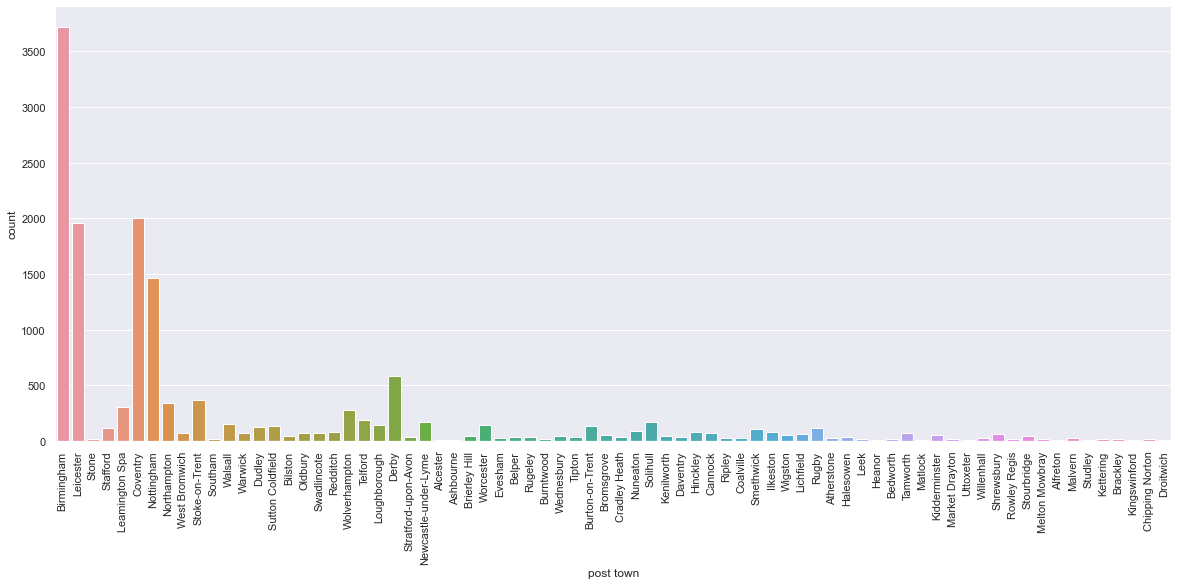

In [264]:
#Visualise post town
#74 unique post towns
plt.figure(figsize = (20,8))
sns.countplot(x = dataset["post town"])
plt.xticks(rotation=90)

In [272]:
#import dataset called midlandcities (contains list of cities and towns in east midlands and west midlands)

df_cities = pd.read_excel('/Users/lucy/Desktop/midlandcities.xlsx')

In [273]:
#lookup from df_cities to categories instances into west or east midlands based on post town
dataset = pd.merge(dataset,df_cities,on ='post town',how ='inner')

In [274]:
#Check the count of the column. Also no null values
dataset['region'].value_counts()

West Midlands    9646
East Midlands    5127
Name: region, dtype: int64

In [275]:
#To check the information in the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14773 entries, 0 to 14772
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   published date        14773 non-null  datetime64[ns]
 1   post town             14773 non-null  object        
 2   property type         14773 non-null  object        
 3   furnished state       14773 non-null  object        
 4   bedrooms              14773 non-null  int64         
 5   bathrooms             14773 non-null  int64         
 6   num_reception         14773 non-null  int64         
 7   bills_included        14773 non-null  object        
 8   latitude              14773 non-null  float64       
 9   longitude             14773 non-null  float64       
 10  monthly rent          14773 non-null  int64         
 11  dist_rail             14773 non-null  float64       
 12  dist_school           14773 non-null  float64       
 13  ofsted_rating_sc

<b>Interaction Features between bedrooms and reception and bathrooms and reception as reception does not have a association with rent</b>

In [276]:
#Feature interaction (bedrooms and receptions)
dataset['bed*recep'] = dataset["bedrooms"]*dataset["num_reception"]

In [277]:
#Feature Interaction (bathrooms and receptions)
dataset['bath*recep'] = dataset["bathrooms"]*dataset["num_reception"]

In [279]:
#Recheck missing values
dataset.isnull().sum()

published date          0
post town               0
property type           0
furnished state         0
bedrooms                0
bathrooms               0
num_reception           0
bills_included          0
latitude                0
longitude               0
monthly rent            0
dist_rail               0
dist_school             0
ofsted_rating_school    0
cluster_label           0
has_parking             0
has_garden              0
has_balcony             0
student_friendly        0
month                   0
season                  0
region                  0
bed*recep               0
bath*recep              0
dtype: int64

13 new features have been engineered

<b>Explorary data analysis</b>

In [280]:
#Summary statistics
dataset.describe()

,bedrooms,bathrooms,num_reception,latitude,longitude,monthly rent,dist_rail,dist_school,bed*recep,bath*recep
count,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000,14773.000000
mean,2.177757,1.337237,0.797536,52.580905,-1.626661,927.134231,1.755942,0.344093,1.957693,1.096527
std,1.368755,0.794898,0.647405,0.221518,0.388543,522.947638,1.744168,0.231469,2.258009,1.241771
min,0.000000,1.000000,0.000000,51.853943,-2.919140,217.000000,0.016000,0.001000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,52.428753,-1.927918,650.000000,0.685000,0.201000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,52.494186,-1.559606,775.000000,1.321000,0.305000,2.000000,1.000000
75%,3.000000,1.000000,1.000000,52.681625,-1.214702,995.000000,2.177000,0.434000,3.000000,2.000000
max,11.000000,10.000000,4.000000,53.116110,-0.776808,5000.000000,16.408000,3.627000,32.000000,18.000000


Text(0, 0.5, 'Count')

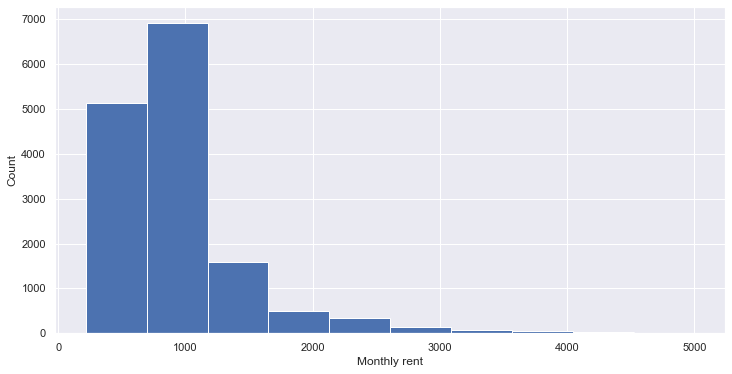

In [114]:
#visualise histogram of monthly rent
hist_plot = dataset['monthly rent']
hist_plot.hist(figsize=(12,6), bins=10)
plt.xlabel('Monthly rent')
plt.ylabel('Count')

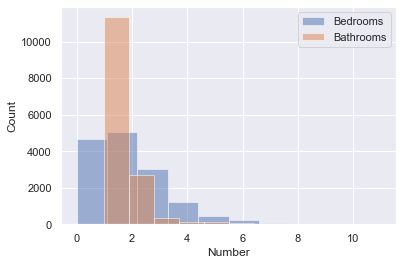

In [121]:
#Visualise histograms of beds and baths
from matplotlib import pyplot
bed_h = dataset['bedrooms']
bath_h = dataset['bathrooms']
pyplot.hist(bed_h, alpha=0.5, label='Bedrooms')
pyplot.hist(bath_h, alpha=0.5, label='Bathrooms')
pyplot.legend(loc='upper right')
pyplot.xlabel('Number')
pyplot.ylabel('Count')
pyplot.show()

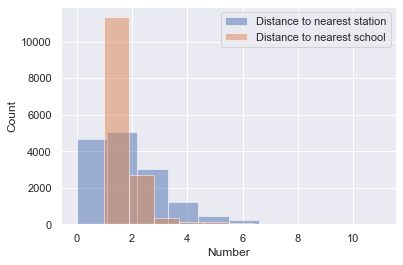

In [134]:
#Visualise histograms of distance to nearest station and distance to school
from matplotlib import pyplot
rail_h = dataset['dist_rail']
school_h = dataset['dist_school']
pyplot.hist(bed_h, alpha=0.5, label='Distance to nearest station')
pyplot.hist(bath_h, alpha=0.5, label='Distance to nearest school')
pyplot.legend(loc='upper right')
pyplot.xlabel('Distance (kms)')
pyplot.ylabel('Count')
pyplot.show()

/Users/lucy/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'bath*recep'}>,
        <AxesSubplot:title={'center':'bed*recep'}>]], dtype=object)

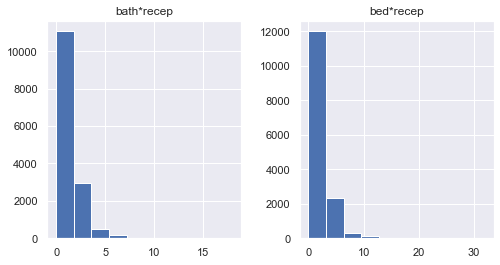

In [281]:
#Visualise histograms of the feature interaction variables
dataset[['bed*recep', 'bath*recep']].hist(figsize=(8, 4))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

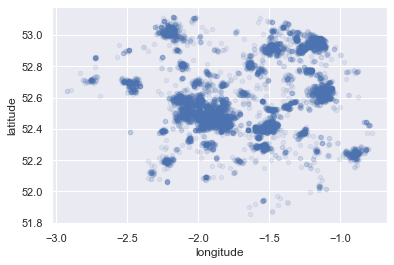

In [123]:
#scatterplot of latitude and longitude
dataset.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

<AxesSubplot:>

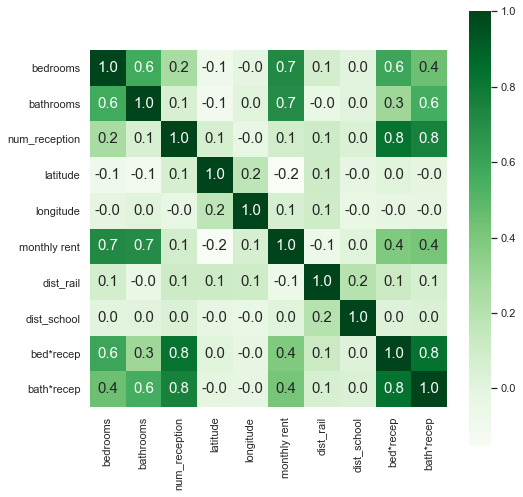

In [125]:
#Visualise correlation matrix
corr_matrix=dataset.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

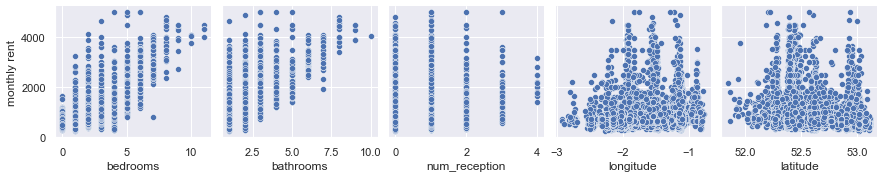

In [290]:
#Visualise pairwise plots of independent variables against monthly rent
sns.pairplot(
    dataset,
    x_vars=["bedrooms", "bathrooms", "num_reception", "longitude", "latitude"],
    y_vars=["monthly rent"],
)


<Figure size 2160x2160 with 0 Axes>

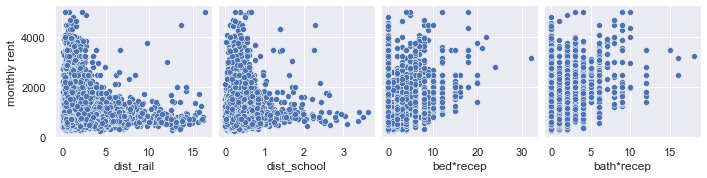

In [286]:
#Visualise pairwise plots of independent variables against monthly rent
plt.figure(figsize = (30,30))
sns.pairplot(
    dataset,
    x_vars=["dist_rail", "dist_school", 'bed*recep', 'bath*recep'],
    y_vars=["monthly rent"],
)

<Figure size 1440x1440 with 0 Axes>

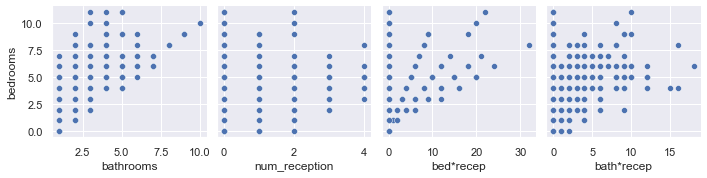

In [131]:
#Visualise pairwise plots of other independent variables against number of bedrooms
plt.figure(figsize = (20,20))
sns.pairplot(
    dataset,
    x_vars=["bathrooms", "num_reception", 'bed*recep', 'bath*recep'],
    y_vars=["bedrooms"],
)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Flat'),
  Text(1, 0, 'Terraced house'),
  Text(2, 0, 'Studio'),
  Text(3, 0, 'Bungalow'),
  Text(4, 0, 'Semi-detached house'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Detached house')])

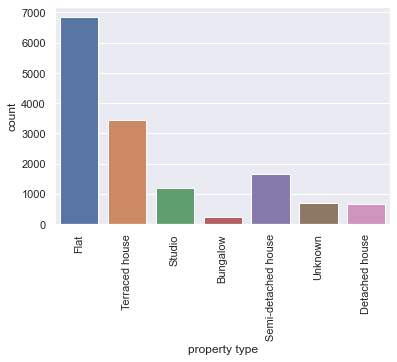

In [165]:
#Frequency of Property Type
ax = sns.countplot(x="property type", data=dataset, )
plt.xticks(rotation=90)


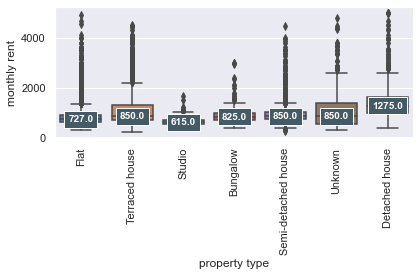

In [167]:
#Visualise boxplot of property type

box_plot = sns.boxplot(x="property type", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

<AxesSubplot:xlabel='furnished state', ylabel='count'>

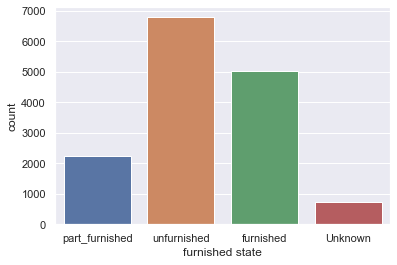

In [156]:
#visualise distribution of furnished state of the property
sns.countplot(x="furnished state", data=dataset)


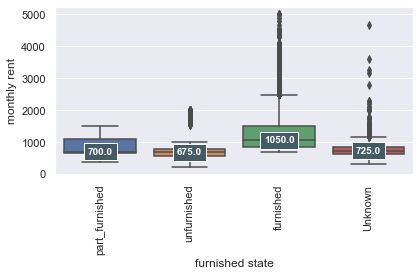

In [151]:
#Visualise boxplot of furnished state

box_plot = sns.boxplot(x="furnished state", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Good'),
  Text(1, 0, 'Inadequate'),
  Text(2, 0, 'Outstanding'),
  Text(3, 0, 'Requires improvement'),
  Text(4, 0, 'Unknown')])

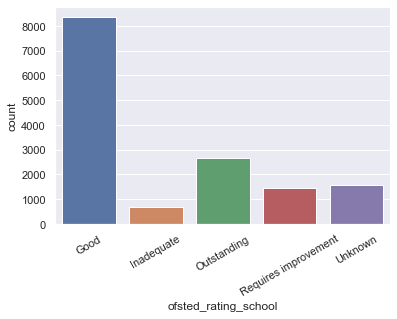

In [168]:
#visualise distribution of ofsted ratings of the school
sns.countplot(x="ofsted_rating_school", data=dataset)
plt.xticks(rotation=30)

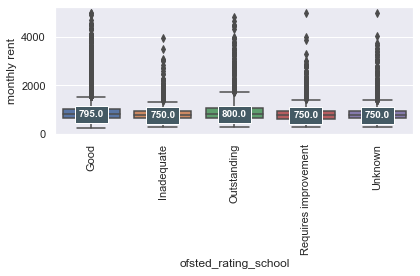

In [169]:
#Visualise boxplot of ofsted school rating

box_plot = sns.boxplot(x="ofsted_rating_school", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

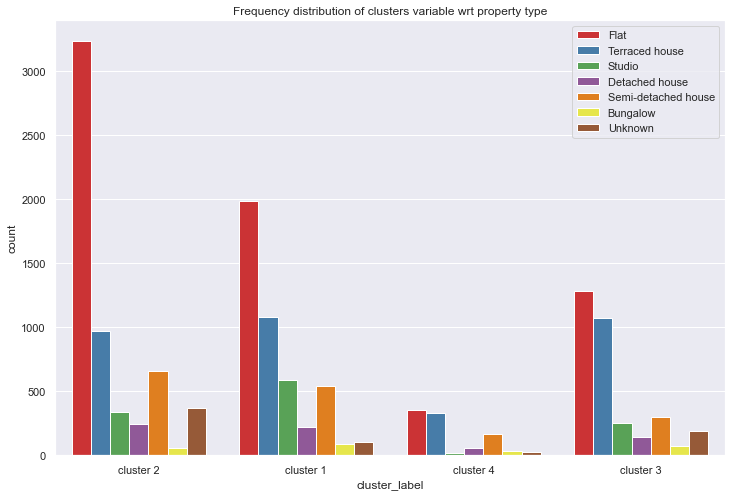

In [265]:
#visualise cluster_label with respect to property type

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="cluster_label", hue="property type", data=dataset, palette="Set1")
ax.set_title("Frequency distribution of clusters variable wrt property type")
ax.legend(loc='upper right')
plt.show()

(array([0, 1, 2, 3]),
 [Text(0, 0, 'cluster 2'),
  Text(1, 0, 'cluster 1'),
  Text(2, 0, 'cluster 3'),
  Text(3, 0, 'cluster 4')])

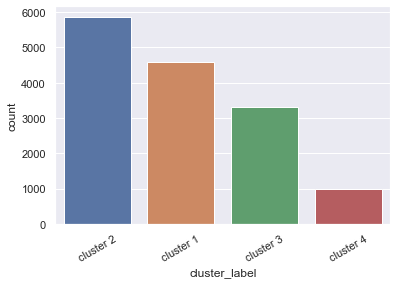

In [315]:
#visualise distribution of ofsted ratings of the school
sns.countplot(x="cluster_label", data=dataset)
plt.xticks(rotation=30)

In [ ]:
#Visualise boxplot of cluster label

box_plot = sns.boxplot(x="cluster_label", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

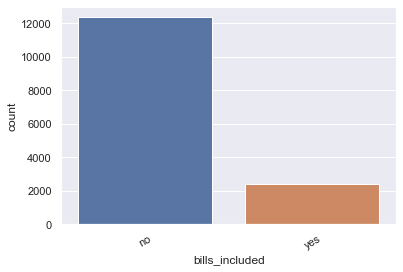

In [174]:
##visualise distribution of bills included
sns.countplot(x="bills_included", data=dataset)
plt.xticks(rotation=30)

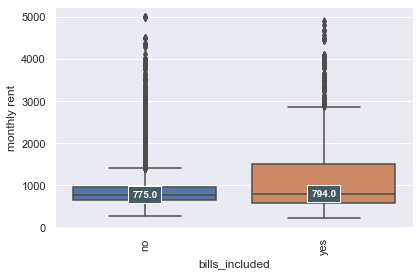

In [172]:
#Visualise boxplot of bills included

box_plot = sns.boxplot(x="bills_included", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

(array([0, 1]), [Text(0, 0, 'no'), Text(1, 0, 'yes')])

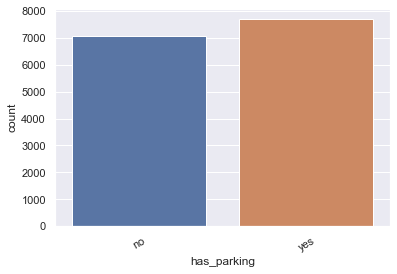

In [175]:
sns.countplot(x="has_parking", data=dataset)
plt.xticks(rotation=30)

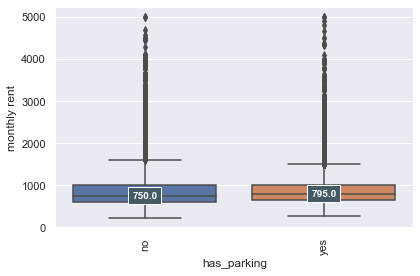

In [176]:
#Visualise boxplot of has_parking

box_plot = sns.boxplot(x="has_parking", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

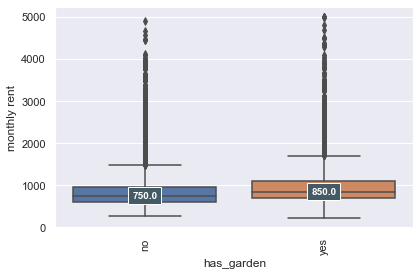

In [178]:
#Visualise boxplot of has_garden

box_plot = sns.boxplot(x="has_garden", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

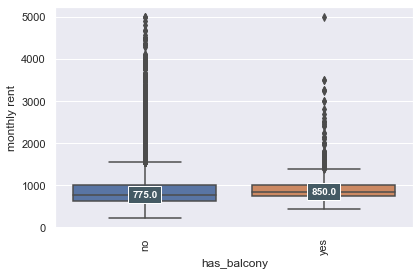

In [179]:
#Visualise boxplot of has_balcony

box_plot = sns.boxplot(x="has_balcony", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

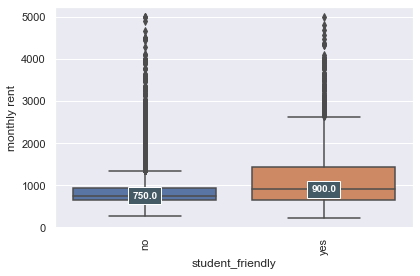

In [180]:
#Visualise boxplot of studnet friendly

box_plot = sns.boxplot(x="student_friendly", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

<AxesSubplot:xlabel='count', ylabel='month'>

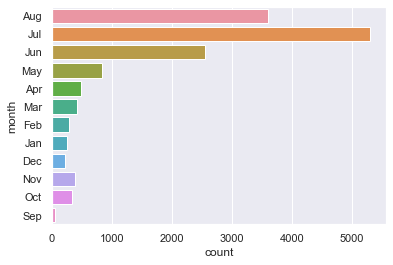

In [184]:
#visualise frequency of month

sns.countplot(y="month", data=dataset)


<AxesSubplot:xlabel='count', ylabel='season'>

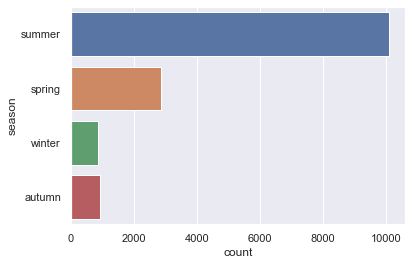

In [185]:
#visualise frequency of season
sns.countplot(y="season", data=dataset)

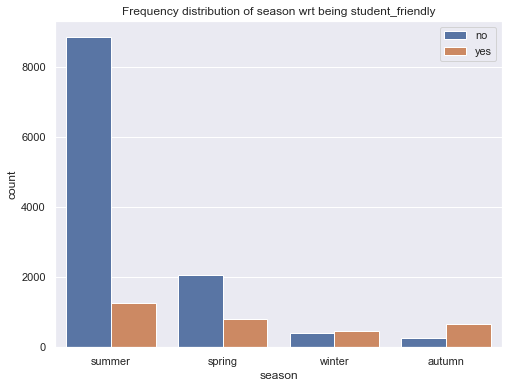

In [293]:
#visualise Frequency distribution of season wrt being student_friendly

f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="season", hue="student_friendly", data=dataset)
ax.set_title("Frequency distribution of season wrt being student_friendly")
ax.legend(loc='upper right')
plt.show()

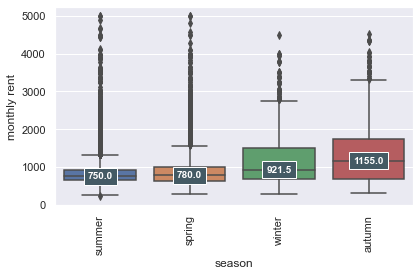

In [196]:
#Visualise boxplot of season

box_plot = sns.boxplot(x="season", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

<AxesSubplot:xlabel='count', ylabel='region'>

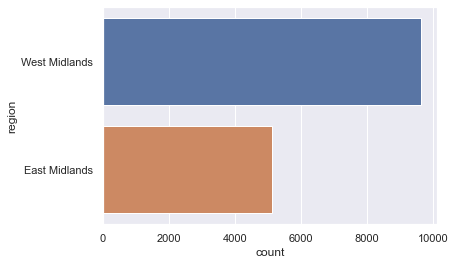

In [197]:
#Visualise frequency of region
sns.countplot(y="region", data=dataset)

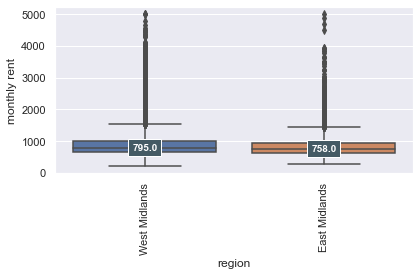

In [198]:
#Visualise boxplot of region

box_plot = sns.boxplot(x="region", y="monthly rent", data=dataset)

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()
plt.xticks(rotation=90)

for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1) 

    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='bold', 
        size=10,
        color='white',
        bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()

<b>Outlier detection using Interquartile method</b>

<AxesSubplot:xlabel='monthly rent'>

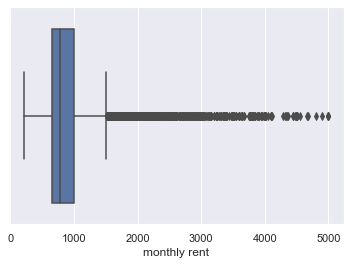

In [201]:
#visualise boxplot of monthly rent
sns.boxplot(x = dataset['monthly rent'])

In [203]:
#Find interquartile range, upper and lower bound range

rent = dataset['monthly rent']

# finding the 1st quartile
q1 = np.quantile(rent, 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(rent, 0.75)
med = np.median(rent)
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

345.0 1512.5 132.5


In [207]:
#Number of records above and below the range which is the outliers 
len(dataset[(dataset['monthly rent'] < lower_bound) | (dataset['monthly rent'] > upper_bound)])

1371

In [297]:
#Drop published date and post town
dataset = dataset.drop(['published date', 'post town'], axis=1)

##<b>Data Preparation: Handling categorical variables, spilting the dataset into train and test and feature scaling</b>##

In [298]:
#Print categorical variables in the dataset
#There are 12 categorical variables in the dataset
categorical = [var for var in dataset.columns if dataset[var].dtype=='O']

print('There are {} categorical variables \n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 12 categorical variables 

The categorical variables are :

 ['property type', 'furnished state', 'bills_included', 'ofsted_rating_school', 'cluster_label', 'has_parking', 'has_garden', 'has_balcony', 'student_friendly', 'month', 'season', 'region']


In [301]:
#Splitting the dataset into train and test set in 80:20 split
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(dataset, test_size=0.20, random_state=1)
print(f"{train_set.shape[0]} train and {test_set.shape[0]} test instances")

11818 train and 2955 test instances


In [306]:
#Convert categorical variables into numerical variables
#Define class to onehot encode categorical variables

from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin

class My_encoder(BaseEstimator, TransformerMixin):
   
    def __init__(self,drop = 'first',sparse=False):
        self.encoder = OneHotEncoder(drop = drop,sparse = sparse)
        self.features_to_encode = []
        self.columns = []
    
    def fit(self,X_train,features_to_encode):
        
        data = X_train.copy()
        self.features_to_encode = features_to_encode
        data_to_encode = data[self.features_to_encode]
        self.columns = pd.get_dummies(data_to_encode,drop_first = True).columns
        self.encoder.fit(data_to_encode)
        return self.encoder
    
    def transform(self,X_test):
        
        data = X_test.copy()
        data.reset_index(drop = True,inplace =True)
        data_to_encode = data[self.features_to_encode]
        data_left = data.drop(self.features_to_encode,axis = 1)
        
        data_encoded = pd.DataFrame(self.encoder.transform(data_to_encode),columns = self.columns)
        
        return pd.concat([data_left,data_encoded],axis = 1)

In [309]:
#Convert all the categorical variables in the dataset into numerical variables using one hot encoder

features_to_encode = ['property type', 'furnished state', 'ofsted_rating_school', 'cluster_label', 'bills_included', 'has_parking', 'has_garden', 'has_balcony', 'student_friendly', 'month', 'season', 'region']
enc = My_encoder()
enc.fit(train_set,features_to_encode)
train_set = enc.transform(train_set)
test_set = enc.transform(test_set)

In [310]:
#Check if categorical variables are converted
train_set

,bedrooms,bathrooms,num_reception,latitude,longitude,monthly rent,dist_rail,dist_school,bed*recep,bath*recep,...,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep,season_spring,season_summer,season_winter,region_West Midlands
0,3,1,1,52.462000,-1.964599,1050,2.228,0.202,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1,1,1,52.481224,-1.911889,795,0.938,0.128,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,1,2,53.114500,-2.176219,525,4.979,0.261,4,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,2,1,1,52.912323,-1.529160,675,4.111,0.330,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,1,1,52.625570,-1.114090,650,0.956,0.175,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11813,2,1,1,52.439003,-1.935554,542,0.334,0.470,2,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
11814,3,2,1,52.593056,-1.134011,895,1.186,0.187,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
11815,1,1,1,52.902200,-1.478080,325,0.721,0.273,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
11816,1,1,1,52.452717,-1.878321,575,1.783,0.127,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


<b>train_set and test_set was exported into an excel file on the local drive to be used on different notebooks. 
Feature scaling is done in modelling notebooks.</b>

In [311]:
#Split the train_set into X and y to use mutual information classif to find non linear relationships between independnet variables and monthly rent
X = train_set.drop("monthly rent", axis=1)

y = train_set["monthly rent"].copy()

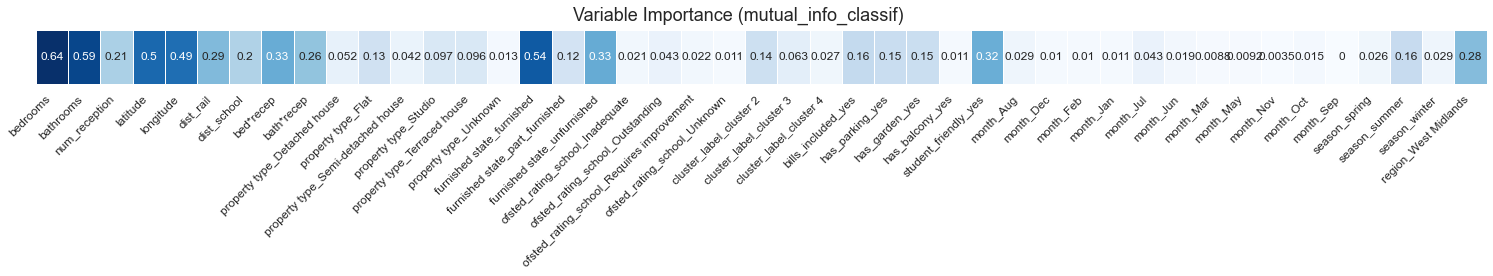

In [313]:
#Use mutual information to find variables with generic relationships 
# visualize variable importance 

from sklearn.feature_selection import mutual_info_classif
mutual_information = mutual_info_classif(X, y)

plt.subplots(1, figsize=(26, 1))
sns.heatmap(mutual_information[:, np.newaxis].T, cmap='Blues', cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(X.columns, rotation=45, ha='right', fontsize=12)
plt.suptitle("Variable Importance (mutual_info_classif)", fontsize=18, y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)
pass

The trainset and test set is used for all the modelling analysis. Feature scaling is done on the modelling notebooks